Exploring visualization techniques with Python!

We'll start with some very basic examples exploring time series visualization. First, we'll use as data RTT measurements (ping) from my office at DEIB to www.google.com, passing or not passing through the department's VPN.

We need to mount the Google drive folder to retrieve the measurement file (RTT_measurements.csv). It will be accessible at '/content/drive/MyDrive/Colab Notebooks'

We will use pandas to load the csv into a dataframe.



In [ ]:
!apt-get install tcpdump
!pip install pyshark
!apt-get install tshark
!apt-get install net-tools

In [ ]:
import numpy as np
import pandas as pd

import pyshark
import nest_asyncio

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RTT_measurements.csv')
display(df)

no_vpn = df['NO VPN']
vpn = df['VPN']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NO VPN,VPN
0,1.972,2.679
1,1.688,2.800
2,1.673,2.706
3,1.693,2.702
4,1.949,2.519
...,...,...
395,1.862,2.737
396,1.825,2.743
397,1.813,3.071
398,1.673,2.604


OK now let's plot the two sets of measurements on two time series plots. What we can say from those plots?

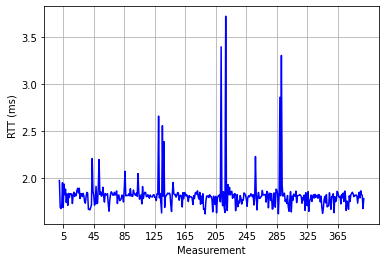

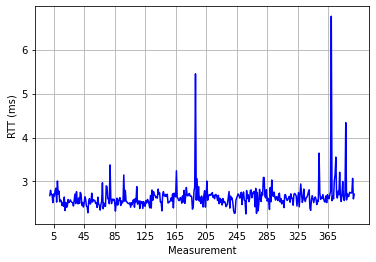

In [ ]:

fig = plt.figure()
plt.plot(no_vpn, 'b')
plt.xlabel("Measurement")
plt.ylabel("RTT (ms)")
plt.xticks(np.arange(5, len(no_vpn), step=len(no_vpn)/10))
plt.grid(visible=True)

fig = plt.figure()
plt.plot(vpn, 'b')
plt.xlabel("Measurement")
plt.ylabel("RTT (ms)")
plt.xticks(np.arange(5, len(no_vpn), step=len(no_vpn)/10))
plt.grid(visible=True)

Maybe it's better to uniform the axis range and plot the two figures side by side...

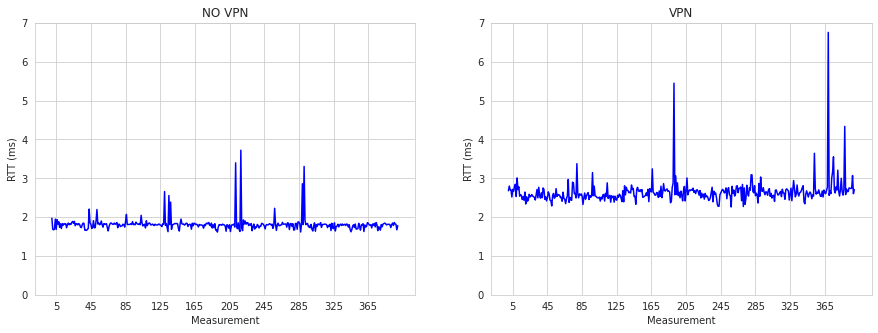

In [ ]:

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.plot(no_vpn,'b')
ax1.set(xlabel = 'Measurement')
ax1.set(ylabel = 'RTT (ms)')
ax1.set_xticks(np.arange(5, len(no_vpn), step=len(no_vpn)/10))
ax1.grid(visible=True)
ax1.set_ylim(0,7)
ax1.set_title('NO VPN')


ax2.plot(vpn, 'b')
ax2.set(xlabel = 'Measurement')
ax2.set(ylabel = 'RTT (ms)')
ax2.set_xticks(np.arange(5, len(no_vpn), step=len(no_vpn)/10))
ax2.grid(visible=True)
ax2.set_ylim(0,7)
ax2.set_title('VPN')



OK. let's move to another example focusing on KPIs from a LTE base station (LTE_measurements.csv)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LTE_measurements.csv')
display(df)

,Date,VOL_DL,VOL_UL
0,04/10/2021 00:00,6439745092,514574060
1,04/10/2021 01:00,3962790419,368510572
2,04/10/2021 02:00,2330641870,268064028
3,04/10/2021 03:00,1439348088,240067764
4,04/10/2021 04:00,1074666616,208859849
...,...,...,...
667,31/10/2021 19:00,8392265664,823810612
668,31/10/2021 20:00,8375786412,805322407
669,31/10/2021 21:00,9592988290,798751010
670,31/10/2021 22:00,9487575199,744624537


Let's focus on Downlink and Uplink volumes and plot them on a time plot. This will hopefully already reveal something.

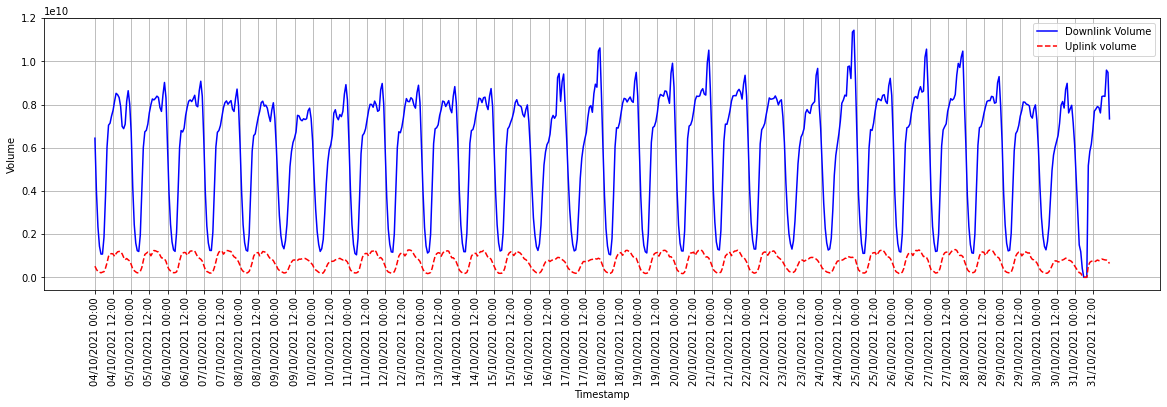

In [ ]:
fig = plt.figure(figsize=(20,5))

plt.plot(df['Date'],df['VOL_DL'], 'b')
plt.plot(df['Date'],df['VOL_UL'], 'r--')

plt.ylabel("Volume")
plt.xlabel("Timestamp")
plt.grid(visible=True)
plt.legend(['Downlink Volume','Uplink volume'])
plt.xticks(np.arange(0, len(df['VOL_DL']), step=len(df['VOL_DL'])/56), rotation = 'vertical')



Let's try to compute and visualize the so called Median Weekly Signature (e.g., the median over all days in a week). We'll use the reshape function to move from a 672x1 array to a 168x4 matrix. Then, we will take the median over the columns to end up with a 168x1 array.

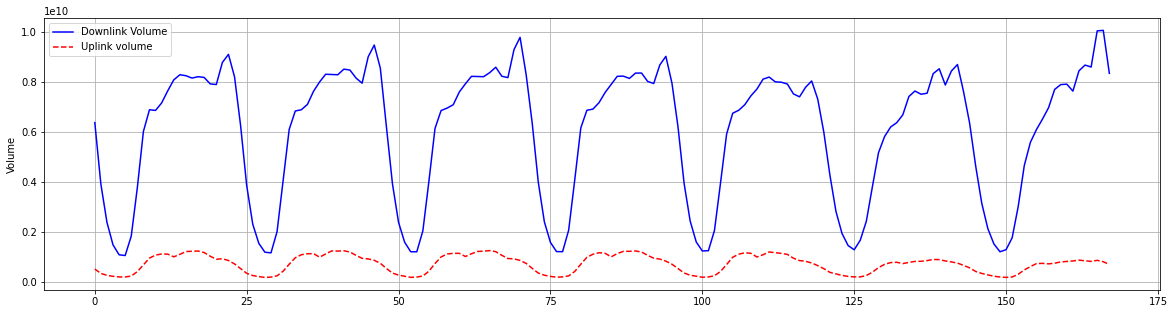

In [ ]:
vol_dl = df['VOL_DL'].to_numpy()
vol_ul = df['VOL_UL'].to_numpy()

vol_dl_res = np.reshape(vol_dl,[4,168])
vol_ul_res = np.reshape(vol_ul,[4,168])

mws_dl = np.median(vol_dl_res,axis=0)
mws_ul = np.median(vol_ul_res,axis=0)

fig = plt.figure(figsize=(20,5))

plt.plot(mws_dl, 'b')
plt.plot(mws_ul, '--r')

plt.ylabel("Volume")
plt.grid(visible=True)
plt.legend(['Downlink Volume','Uplink volume'])


Let's go back to our RTT measurements and see some summary tables for the two sets of measurements:

In [ ]:
no_vpn.describe()

count    400.000000
mean       1.815683
std        0.183240
min        1.616000
25%        1.761500
50%        1.807500
75%        1.831000
max        3.724000
Name: NO VPN, dtype: float64

In [ ]:
vpn.describe()

count    400.000000
mean       2.645553
std        0.313588
min        2.262000
25%        2.524750
50%        2.610500
75%        2.701000
max        6.758000
Name: VPN, dtype: float64

And let's visualize the histogram of the two sets of measurements!

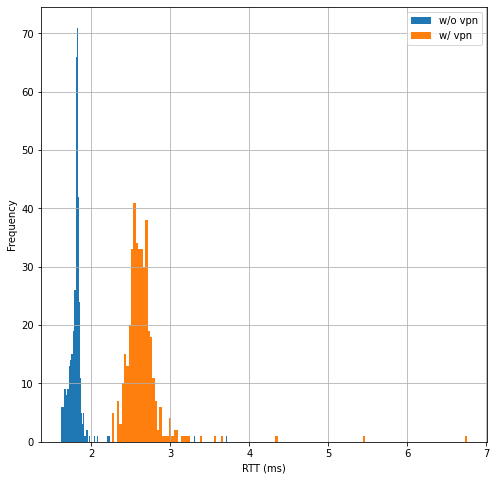

In [ ]:
fig = plt.figure(figsize=(8,8))

plt.hist(no_vpn, 150, density=False)
plt.hist(vpn, 150, density=False)
plt.legend(['w/o vpn','w/ vpn'])
plt.grid(visible=True)
plt.xlabel("RTT (ms)")
plt.ylabel("Frequency")


Let's visualize the Cumulative Density Function

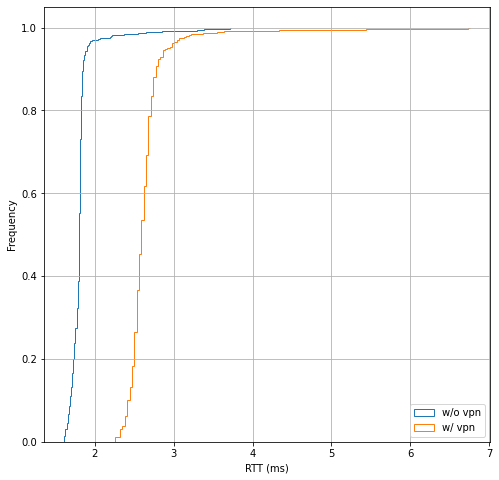

In [ ]:
fig = plt.figure(figsize=(8,8))

n,bins,patches = plt.hist(no_vpn, 150, density=True, cumulative=True, histtype='step')
patches[0].set_xy(patches[0].get_xy()[:-1])

n,bins,patches = plt.hist(vpn, 150, density=True, cumulative=True, histtype='step')
patches[0].set_xy(patches[0].get_xy()[:-1])

plt.legend(['w/o vpn','w/ vpn'],loc='lower right')
plt.grid(visible=True)
plt.xlabel("RTT (ms)")
plt.ylabel("Frequency")



And finally let's use boxplots!

Text(0, 0.5, 'RTT (ms)')

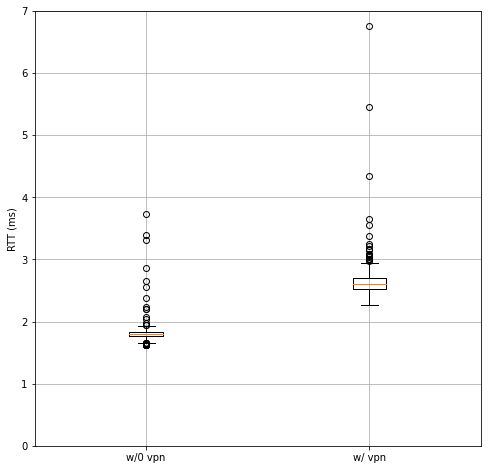

In [ ]:
fig = plt.figure(figsize=(8,8))

plt.boxplot([no_vpn, vpn], labels=['w/0 vpn', 'w/ vpn'])
plt.grid(visible=True)
plt.ylim([0,7])
plt.ylabel('RTT (ms)')

The very same visualizations can also be obtained with the Seaborn library:

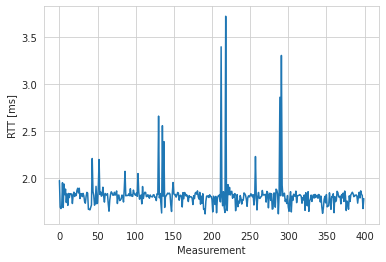

In [ ]:
sns.set_style("whitegrid")
fig = sns.lineplot(x=range(0, len(no_vpn)),y=no_vpn)
fig.set_xlabel('Measurement')
fig.set_ylabel('RTT [ms]')

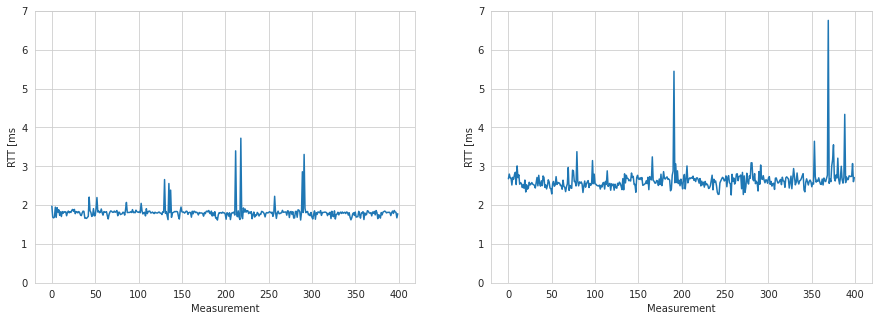

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.set_style("whitegrid")
fig1 = sns.lineplot(ax=ax1,x=range(0, len(no_vpn)),y=no_vpn)
fig2 = sns.lineplot(ax=ax2,x=range(0, len(vpn)),y=vpn)

for f in [fig1,fig2]:
  f.set_ylim([0,7])
  f.set_xlabel('Measurement')
  f.set_ylabel('RTT [ms')

Text(0, 0.5, 'RTT [ms]')

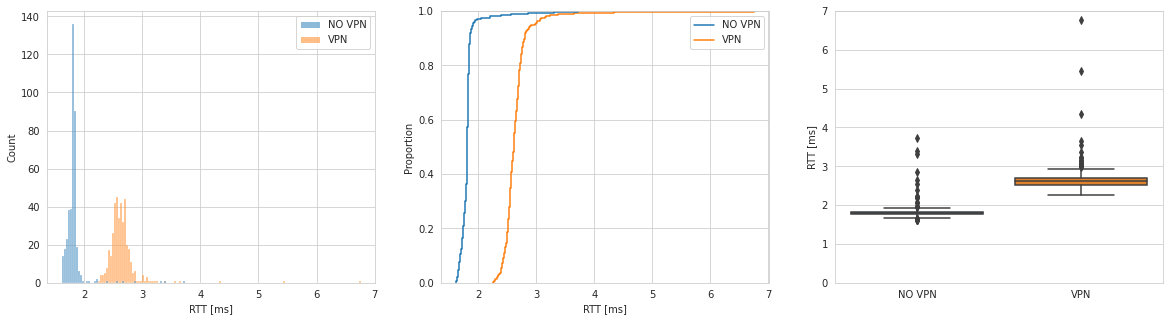

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
sns.set_style("whitegrid")

fig1 = sns.histplot(ax=ax1,data=df,bins=150)
fig1.set_xlabel('RTT [ms]')

fig2 = sns.ecdfplot(ax=ax2,data=df)
fig2.set_xlabel('RTT [ms]')

fig3 = sns.boxplot(ax=ax3,data=df)
fig3.set_ylim([0,7])
fig3.set_ylabel('RTT [ms]')

Plotting data one against the other

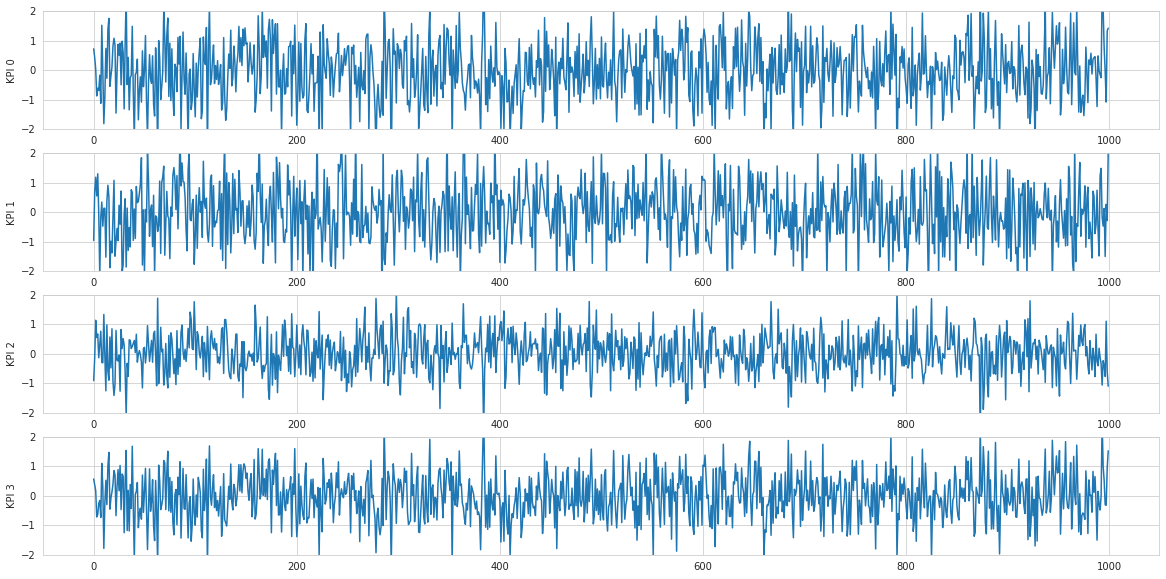

<Figure size 576x576 with 0 Axes>

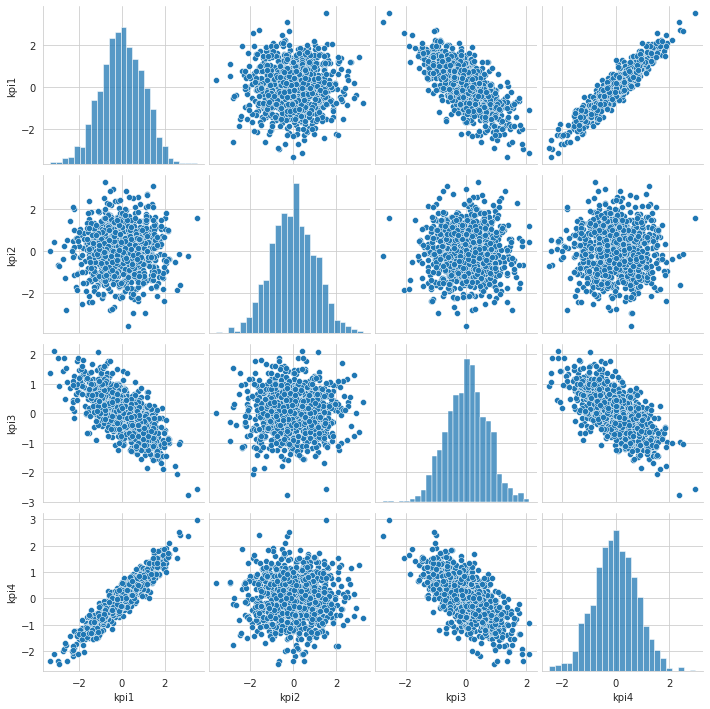

In [ ]:
kpi1 = np.random.randn(1000,1)
kpi2 = np.random.randn(1000,1)
kpi3 = -0.5*kpi1 + 0.5*np.random.randn(1000,1)
kpi4 = 0.75*kpi1 + 0.25*np.random.randn(1000,1)

df = pd.DataFrame(np.hstack((kpi1, kpi2, kpi3, kpi4)), columns = ['kpi1','kpi2','kpi3','kpi4'])
sns.set_style("whitegrid")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(20,10))

KPI = [kpi1,kpi2,kpi3,kpi4]

AX = [ax1,ax2,ax3,ax4]
for idx in range(4): 
  kp = np.squeeze(KPI[idx])
  sns.set_style("whitegrid")
  f = sns.lineplot(ax=AX[idx],x=range(0, len(kp)),y=kp)
  f.set_ylim([-2,2])
  f.set_ylabel('KPI ' + str(idx) )

fig = plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
#f = sns.scatterplot(data=df,x='kpi1',y='kpi3')
f = sns.pairplot(data=df)



And finally, Sankey diagrams for representing traffic! We'll use the same traffic capture we did for the tcpdump example

In [1]:
!tcpdump -G 60 -W 1 -w 'tcp_capture.pcap' -i eth0 'tcp'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpcap0.8
Suggested packages:
  apparmor
The following NEW packages will be installed:
  libpcap0.8 tcpdump
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 482 kB of archives.
After this operation, 1,408 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpcap0.8 amd64 1.8.1-6ubuntu1.18.04.2 [118 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 tcpdump amd64 4.9.3-0ubuntu0.18.04.1 [364 kB]
Fetched 482 kB in 0s (4,386 kB/s)
Selecting previously unselected package libpcap0.8:amd64.
(Reading database ... 155332 files and directories currently installed.)
Preparing to unpack .../libpcap0.8_1.8.1-6ubuntu1.18.04.2_amd64.deb ...
Unpacking libpcap0.8:amd64 (1.8.1-6ubuntu1.18.04.2) ...
Selecting previously unselected package tcpdump.
Prepari

In [2]:
nest_asyncio.apply()
cap = pyshark.FileCapture('tcp_capture.pcap')

INDEXES = []
CONVERSATIONS = {'address_a': [], 'address_b': [], 'port_a': [], 'port_b': [], 'bytes': [], 'packets': [], 'start': [],'duration': []}

for packet in cap:
  
  address_a = packet.ip.src
  address_b = packet.ip.dst
  port_a = packet.tcp.srcport
  port_b = packet.tcp.dstport
  packet_bytes = packet.length
  packet_timestamp = packet.sniff_timestamp
  
  d = tuple([address_a, address_b, port_a, port_b])
  entry = hash(d)

  if entry in INDEXES:
    loc = INDEXES.index(entry)
    CONVERSATIONS['bytes'][loc] += int(packet_bytes)
    CONVERSATIONS['packets'][loc] += 1 
    CONVERSATIONS['duration'][loc] = float(packet_timestamp) - float(CONVERSATIONS['start'][loc])

  else:
    INDEXES.append(entry)
    CONVERSATIONS['address_a'].append(address_a)
    CONVERSATIONS['address_b'].append(address_b)
    CONVERSATIONS['port_a'].append(port_a)
    CONVERSATIONS['port_b'].append(port_b)
    CONVERSATIONS['bytes'].append(int(packet_bytes))
    CONVERSATIONS['packets'].append(1)
    CONVERSATIONS['start'].append(float(packet_timestamp))
    CONVERSATIONS['duration'].append(0)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libc-ares2 libcap2-bin liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpam-cap
  libsbc1 libsmi2ldbl libspandsp2 libwireshark-data libwireshark11 libwiretap8
  libwscodecs2 libwsutil9 wireshark-common
Suggested packages:
  mmdb-bin snmp-mibs-downloader wireshark-doc
The following NEW packages will be installed:
  libc-ares2 libcap2-bin liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpam-cap
  libsbc1 libsmi2ldbl libspandsp2 libwireshark-data libwireshark11 libwiretap8
  libwscodecs2 libwsutil9 tshark wireshark-common
0 upgraded, 16 newly installed, 0 to remove and 39 not upgraded.
Need to get 16.4 MB of archives.
After this operation, 95.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libcap2-bin amd64 1:2.25-1.2 [20.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpam-cap

Let's convert the dictionary in a pandas dataframe and play a bit with it. Pandas easily allows to query the dataframe. For example, let's try to select (and later visualize with a Sankey diagram) the tcp flows outgoing from the VM.

In [3]:
!ifconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  net-tools
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 194 kB of archives.
After this operation, 803 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 net-tools amd64 1.60+git20161116.90da8a0-1ubuntu1 [194 kB]
Fetched 194 kB in 0s (2,716 kB/s)
Selecting previously unselected package net-tools.
(Reading database ... 155837 files and directories currently installed.)
Preparing to unpack .../net-tools_1.60+git20161116.90da8a0-1ubuntu1_amd64.deb ...
Unpacking net-tools (1.60+git20161116.90da8a0-1ubuntu1) ...
Setting up net-tools (1.60+git20161116.90da8a0-1ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
eth0: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 172.28.0.2  netmask 255.255.0.0  broadcast 172.28.255.255
        ether 02:42:a

In [4]:
# convert the dict in a dataframe
df = pd.DataFrame(CONVERSATIONS)

#get only entries where address_a is 172.28.0.2 (outgoing traffic)
df2 = df.loc[(df['address_a'] == "172.28.0.2")]

#groupby outgoing port and destination address, summing the other entries (packets, bytes, duration)
df3 = df2.groupby(['address_a','port_a','address_b']).sum().reset_index()
display(df3)

#now get the unique destination addresses and destination ports, with the corresponding indexes in the lists
addr_b, idx_addr_b = np.unique(df3['address_b'], return_inverse=True )
port_a, idx_port_a = np.unique(df3['port_a'], return_inverse=True)
print(addr_b, idx_addr_b)
print(port_a, idx_port_a)

#construct ausiliary lists for drawing the sankey diagram
source = [*[0] * len(idx_addr_b), *[x+1 for x in idx_port_a]]
target = [*[x+1 for x in idx_port_a], *[x+len(idx_port_a)+1 for x in idx_addr_b]]
values = [*df3['bytes'], *df3['bytes']]

print(source)
print(target)

labels = ['172.28.0.2', *port_a.tolist(), *addr_b.tolist()]
print(labels)
print(values)

,address_a,port_a,address_b,bytes,packets,start,duration
0,172.28.0.2,3453,172.28.0.1,1301,3,1.646900e+09,0.007506
1,172.28.0.2,38602,172.28.0.3,743,6,1.646900e+09,47.910974
2,172.28.0.2,38734,172.28.0.3,931,5,1.646900e+09,0.029807
3,172.28.0.2,38750,172.28.0.3,468,5,1.646900e+09,0.005260
4,172.28.0.2,38756,172.28.0.3,931,5,1.646900e+09,0.026072
5,172.28.0.2,38764,172.28.0.3,931,5,1.646900e+09,0.025022
6,172.28.0.2,38782,172.28.0.3,931,5,1.646900e+09,0.022891
7,172.28.0.2,38790,172.28.0.3,927,5,1.646900e+09,0.005260
8,172.28.0.2,38798,172.28.0.3,468,5,1.646900e+09,0.004305
9,172.28.0.2,38804,172.28.0.3,931,5,1.646900e+09,0.022463


['172.28.0.1' '172.28.0.3'] [0 1 1 1 1 1 1 1 1 1 0 1]
['3453' '38602' '38734' '38750' '38756' '38764' '38782' '38790' '38798'
 '38804' '8080' '9000'] [ 0  1  2  3  4  5  6  7  8  9 10 11]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 14]
['172.28.0.2', '3453', '38602', '38734', '38750', '38756', '38764', '38782', '38790', '38798', '38804', '8080', '9000', '172.28.0.1', '172.28.0.3']
[1301, 743, 931, 468, 931, 931, 931, 927, 468, 931, 12933, 7574, 1301, 743, 931, 468, 931, 931, 931, 927, 468, 931, 12933, 7574]


In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = source, #[0, 1, 2, 3], # indices correspond to labels, eg labels[0],labels[1] etc.
      target = target, 
      value = values 
  ))])


fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()